1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


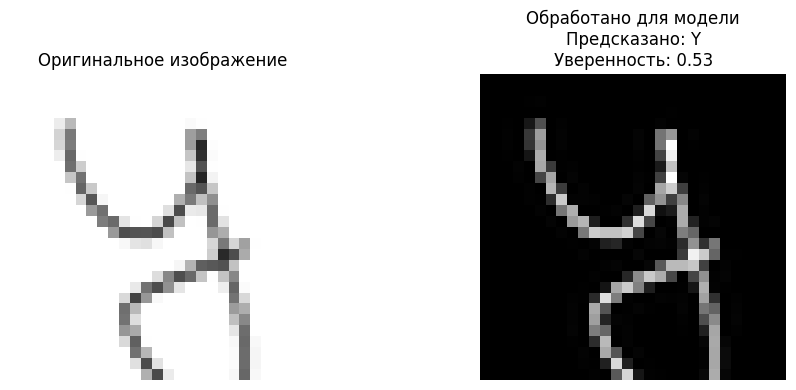

🎯 Распознано: Y
📊 Уверенность: 52.54%


In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Загрузка модели
model = load_model("emnist_model.h5")

def label_to_char(label):
    return chr(label + 65)

def predict_custom_image(image_path):
    try:
        img = Image.open(image_path).convert("L")

        img = img.resize((28, 28), Image.Resampling.LANCZOS)

        if np.mean(img) > 127:
            img = ImageOps.invert(img)

        img_array = np.array(img).astype("float32") / 255.0

        img_input = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_input)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        ax1.imshow(Image.open(image_path).resize((28, 28)), cmap='gray')
        ax1.set_title('Оригинальное изображение')
        ax1.axis('off')

        ax2.imshow(img_array, cmap='gray')
        ax2.set_title(f'Обработано для модели\nПредсказано: {label_to_char(predicted_class)}\nУверенность: {confidence:.2f}')
        ax2.axis('off')

        plt.tight_layout()
        plt.show()

        return predicted_class, confidence

    except Exception as e:
        print(f"Ошибка при обработке изображения: {e}")
        return None, None

if __name__ == "__main__":
    predicted_class, confidence = predict_custom_image("image.jpeg")
    if predicted_class is not None:
        print(f"Распознано: {label_to_char(predicted_class)}")
        print(f"Уверенность: {confidence:.2%}")